STUDENT PERFORMANCE INDIACATOR 

Life Cycle of Machine learning project
 
1. Understanding the problem statement 
2. Data Collection 
3. Data checks to perform 
4. EDA 
5. Data Pre-Processing 
6. Model Training 
7. Choosing best model  

1) Problem Statement 
    This project understands how the students performance (test scores) is affected by other variables such as Gender , Ethnicity , Parental level of education and test preparation Course 

2) Data Collection 
   -DataSet = https://www.kaggle.com/datasets/devansodariya/student-performance-data


2.1 Importing Pandas, Numpy, Matplotlib ,seaborn and Warnings Library

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


Importing CSV Data as Pandas DataFrame  and shape of dataset


In [3]:
df=pd.read_csv('data/stud.csv')
df.shape

(1000, 8)

Top 5 Records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


3. 

Data checks to do

1. Check missing values 
2. Check Duplicates
3. Check data type 
4. Check number of Unique values in each column 
5. Check Various categories present in the different 6.categorical column


In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Check for Duplicates 

In [6]:
df.duplicated().sum()

# df.drop_duplicates()    # to remove duplicates 

0

Dataset DataTypes 

In [7]:
#check for NULL and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking the Number of Unique values in each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Check statistics of dataset 

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights : 

1. From above desciption of numerical data, all means are ver close to 66 to 68.05 
2. All standard deviations are close to 14.6 to 15.19 
3. While there is min score of 0 in math , for writing score min is 10 and min of reading_score is 17

Exploring Data 

In [10]:
print("categories in 'gender' variable:  ", end=" ")
print(df['gender'].unique())

print("categories in 'race_ethnicity' variable:  ", end=" ")
print(df['race_ethnicity'].unique())

print("categories in 'parental_level_of_education' variable:  ", end=" ")
print(df['parental_level_of_education'].unique())

print("categories in 'lunch' variable:  ", end=" ")
print(df['lunch'].unique())

print("categories in 'test_preparation_course' variable:  ", end=" ")
print(df['test_preparation_course'].unique())



categories in 'gender' variable:   ['female' 'male']
categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:   ['standard' 'free/reduced']
categories in 'test_preparation_course' variable:   ['none' 'completed']


In [11]:
#define numerical & categorical columns 
numerical_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print(f'we have {len(numerical_features)} Numerical features : {numerical_features}')
print(f'we have {len(categorical_features)} Numerical features : {categorical_features}')


we have 3 Numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 Numerical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding columns for "Total Score" and "Average"

In [12]:
df['total_score']=df['math_score'] + df['reading_score'] + df['writing_score']
df['average']=df['total_score']/3
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full=df[df['reading_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()

print(f'Number of students with full marks in maths : {math_full}')
print(f'Number of students with full marks in reading : {reading_full}')
print(f'Number of students with full marks in writing : {writing_full}')


Number of students with full marks in maths : 7
Number of students with full marks in reading : 17
Number of students with full marks in writing : 14


In [14]:
reading_less_20= df[df['reading_score']<=20]['average'].count()
writing_less_20= df[df['writing_score']<=20]['average'].count()
math_less_20= df[df['math_score']<=20]['average'].count()

print(f'Number of students with less than 20 marks in maths : {math_less_20}')
print(f'Number of students with less than 20 marks in reading : {reading_less_20}')
print(f'Number of students with less than 20 marks in writing : {writing_less_20}')

Number of students with less than 20 marks in maths : 4
Number of students with less than 20 marks in reading : 1
Number of students with less than 20 marks in writing : 3


Insights 

we got the most full in reading 
and most less than 20 in maths 

Exploring data (visualization )
1. Visualize average score distribution to make some conclusion
    1. Histogram 
    2. Kernel Distribution Function(KDF) 

1. Histogram & KDF

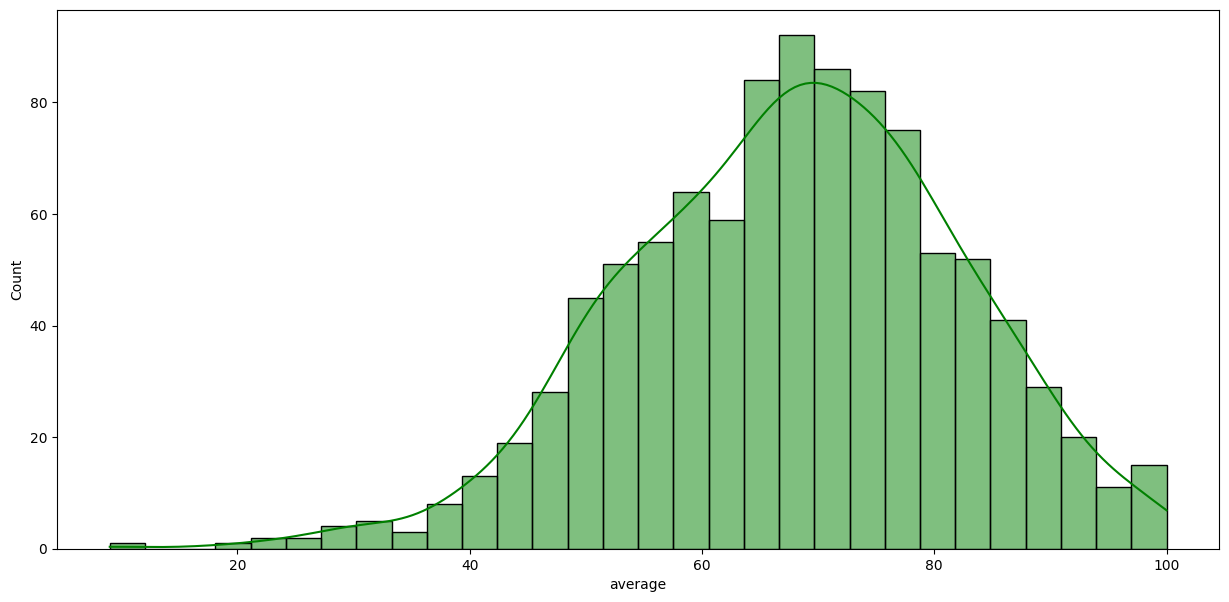

In [15]:
#distribution of score
fig,axis=plt.subplots(figsize=(15,7))
# plt.subplot(1,,1)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.show()

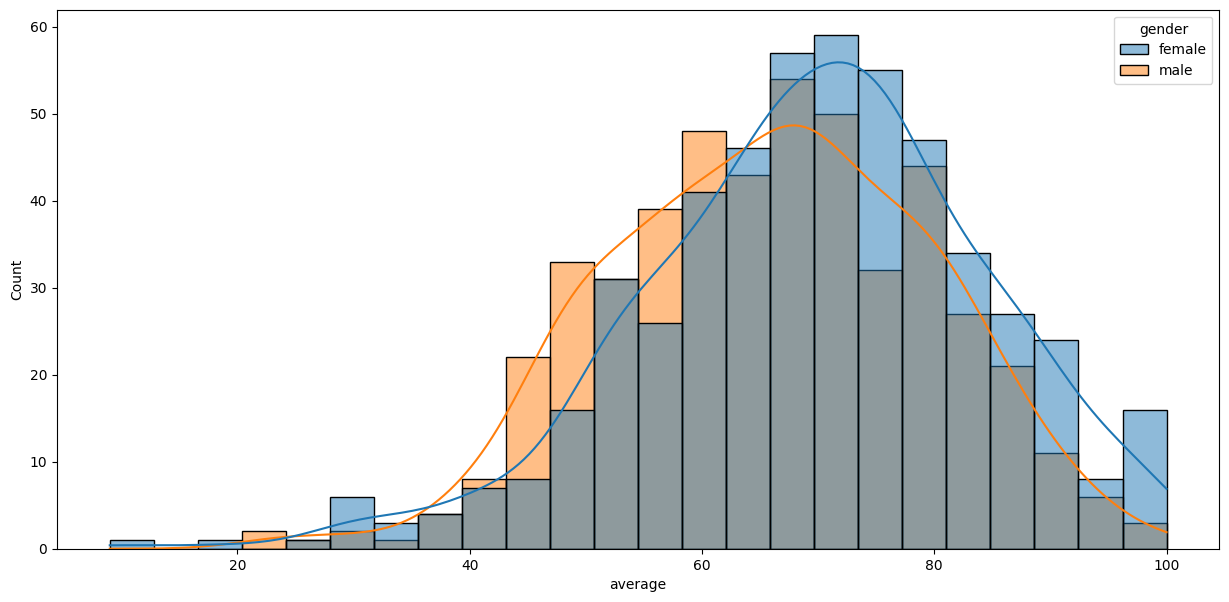

In [16]:
#distribution of score by gender 
fig,axis=plt.subplots(figsize=(15,7))
# plt.subplot(1,,1)
sns.histplot(data=df,x='average',kde=True,hue='gender',color='g')
plt.show()